### MINISTRY OF TRADE
#### TRADE PATTERNS FOR IMPORT AND EXPORT (2014 - 2018)

###### SETUP

In [323]:
#SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from benfordslaw import benfordslaw
import scipy.stats as stats

In [2]:
#import dataset
data = pd.read_excel("Data on TOP 100 EXPORT AND IMPORT  PRODUCTS (1).xlsx",sheet_name = ["EXPORT 2014","IMPORT 2014","EXPORT 2015","IMPORT 2015","EXPORT 2016", "IMPORT 2016","EXPORT 2017","IMPORT 2017","EXPORT 2018","IMPORT 2018"])

In [3]:
#pull export sheets from data
exp14 = data.get("EXPORT 2014")
exp15 = data.get("EXPORT 2015")
exp16 = data.get("EXPORT 2016")
exp17 = data.get("EXPORT 2017")
exp18 = data.get("EXPORT 2018")

In [4]:
#pull import sheets from data
imp14 = data.get("IMPORT 2014")
imp15 = data.get("IMPORT 2015")
imp16 = data.get("IMPORT 2016")
imp17 = data.get("IMPORT 2017")
imp18 = data.get("IMPORT 2018")

##### CLEANING DATA

In [5]:
def clean(df):
    # Task 1: Rename columns
    df = df.rename(columns=df.iloc[0])

    # Task 2: Exclude the first row
    df = df.iloc[1:, :]

    # Task 3: Add new columns
    df["Year"] = int(input("What year"))
    df["IMP/EXP"] = input("Import or Export")
    df = df.astype({'CUSTOM VALUE (GHS)':'int64'})
    df = df.astype({'NETWEIGHT (KGs)':'int64'})
    df["custom_val_usd"] = df['CUSTOM VALUE (GHS)']/float(input("What was the dollar rate for that year? "))

    return df

In [6]:
exp14 = clean(exp14)

What year 2014
Import or Export export
What was the dollar rate for that year?  2.21


In [7]:
exp15 = clean(exp15)

What year 2015
Import or Export export
What was the dollar rate for that year?  3.22


In [8]:
exp16 = clean(exp16)

What year 2016
Import or Export export
What was the dollar rate for that year?  3.95


In [9]:
exp17 = clean(exp17)

What year 2017
Import or Export export
What was the dollar rate for that year?  4.57


In [10]:
exp18 = clean(exp18)

What year 2018
Import or Export export
What was the dollar rate for that year?  4.80


In [11]:
imp14 = clean(imp14)

What year 2014
Import or Export import
What was the dollar rate for that year?  2.21


In [12]:
imp15 = clean(imp15)

What year 2015
Import or Export import
What was the dollar rate for that year?  3.22


In [13]:
imp16 = clean(imp16)

What year 2016
Import or Export import
What was the dollar rate for that year?  3.95


In [14]:
imp17 = clean(imp17)

What year 2017
Import or Export import
What was the dollar rate for that year?  4.57


In [15]:
imp18 = clean(imp18)

What year 2018
Import or Export import
What was the dollar rate for that year?  4.80


##### MERGE DATASETS

In [16]:
df = pd.concat([exp14,exp15,exp16,exp17,exp18,imp14,imp15,imp16,imp17,imp18], axis = 0)

In [17]:
df = df.rename(columns = {'HS CODE':"hs_code",'ITEM DESCRIPTION':"description",'CUSTOM VALUE (GHS)':"custom_val_ghs",'NETWEIGHT (KGs)':"netweight_kgs",'Year':"year","IMP/EXP":"imp_exp"})

#####  FINDING MISSING VALUES

In [18]:
df.isnull().sum()

hs_code           0
description       0
custom_val_ghs    0
netweight_kgs     0
year              0
imp_exp           0
custom_val_usd    0
dtype: int64

In [19]:
df.to_pickle("moti_all")

In [347]:
new = df.copy()
new.sample(10)

,hs_code,description,custom_val_ghs,netweight_kgs,year,imp_exp,custom_val_usd
46,8544600000,"Electric conductors, nes, for a voltage >10...",145664008,4887823,2015,import,4.523727e+07
81,2207200000,Ethyl alcohol and other denatured spirits o...,21811496,2776688,2016,export,5.521898e+06
31,2716000000,Electrical energy,113256423,269677337,2017,export,2.478259e+07
21,0303550000,"Fish, frozen, excluding fish fillets and ot...",306397973,86707436,2015,import,9.515465e+07
29,0303550000,"Fish, frozen, excluding fish fillets and ot...",211887346,70934390,2014,import,9.587663e+07
5,2710192100,Gas oil,1078886335,523796821,2015,export,3.350579e+08
78,3924100000,Tableware and kitchenware of plastics,22930636,2598776,2016,export,5.805224e+06
3,2523100000,Cement clinkers,997017162,3687983426,2018,import,2.077119e+08
33,8512200000,Lighting or visual signalling equipment for...,182765767,2995350,2014,import,8.269944e+07
112,0307590000,"Octopus (excl. live, fresh or chilled)",12512062,523971,2017,export,2.737869e+06


##### FURTHER CLEANING

In [21]:
new.description = new.description.str.lower()
new.description = new.description.str.strip()


In [22]:
new.hs_code = new.hs_code.str.strip()
new['hs_head'] = new.hs_code.str[:4]
new.hs_head = new.hs_head.str.replace(r'^0',"-1",regex = True)
new = new.astype({'hs_head':'int',"custom_val_ghs":"float","custom_val_usd":"float"})

In [23]:
new.sample(5)

,hs_code,description,custom_val_ghs,netweight_kgs,year,imp_exp,custom_val_usd,hs_head
92,7210491000,flat-rolled products of iron or non-alloy stee...,95846492.0,37496782,2016,import,2.426493e+07,7210
9,4911999100,telephone recharge cards,546744269.0,6553,2017,import,1.196377e+08,4911
78,1511909100,"palm oil and its fractions, whether or not ref...",15782837.0,4481134,2015,export,4.901502e+06,1511
97,2931900000,other organo-inorganic compounds: other,107444413.0,5471764,2018,import,2.238425e+07,2931
39,4412310000,"plywood, at least one outer plywood,subheading...",64320403.0,5617101,2015,export,1.997528e+07,4412


In [24]:
new = new.iloc[:,[0,1,2,6,3,4,5,7]]

In [25]:
# new.custom_val_ghs = new.custom_val_ghs.map('{:,}'.format)
# new.custom_val_usd = new.custom_val_usd.map('{:,}'.format)
# new.netweight_kgs  = new.netweight_kgs.map('{:,}'.format)

In [26]:
#new = new.astype({"custom_val_ghs":"float","custom_val_usd":"float"})

In [27]:
new.to_pickle('moti_clean.pkl')

In [28]:
new['hs_head'] = new['hs_head'].astype(str)

# Adjusted conditions to handle numbers with leading zeros
cond = [
    (new['hs_head'] >= '-1001') & (new['hs_head'] <= '-1599'),
    (new['hs_head'] >= '-1601') & (new['hs_head'] <= '1499'),
    (new['hs_head'] >= '1501') & (new['hs_head'] <= '1599'),
    (new['hs_head'] >= '1600') & (new['hs_head'] <= '2499'),
    (new['hs_head'] >= '2500') & (new['hs_head'] <= '2799'),
    (new['hs_head'] >= '2800') & (new['hs_head'] <= '3899'),
    (new['hs_head'] >= '3900') & (new['hs_head'] <= '4099'),
    (new['hs_head'] >= '4100') & (new['hs_head'] <= '4399'),
    (new['hs_head'] >= '4400') & (new['hs_head'] <= '4699'),
    (new['hs_head'] >= '4700') & (new['hs_head'] <= '4999'),
    (new['hs_head'] >= '5000') & (new['hs_head'] <= '6399'),
    (new['hs_head'] >= '6400') & (new['hs_head'] <= '6799'),
    (new['hs_head'] >= '6800') & (new['hs_head'] <= '7099'),
    (new['hs_head'] >= '7100') & (new['hs_head'] <= '7199'),
    (new['hs_head'] >= '7200') & (new['hs_head'] <= '8399'),
    (new['hs_head'] >= '8400') & (new['hs_head'] <= '8599'),
    (new['hs_head'] >= '8600') & (new['hs_head'] <= '8999'),
    (new['hs_head'] >= '9000') & (new['hs_head'] <= '9299'),
    (new['hs_head'] >= '9300') & (new['hs_head'] <= '9399'),
    (new['hs_head'] >= '9400') & (new['hs_head'] <= '9699'),
    (new['hs_head'] >= '9600')
]

choices = [
    'Animal & Animal Products',
    'Vegetable Products',
    'Animal or Vegetable Fats and Oils',
    'Prep. Foodstuffs',
    'Mineral Products',
    'Chemicals & Allied Ind.',
    'Plastics/Rubbers',
    'Raw Hides,Leather, & Furs',
    'Wood & Wood Products',
    'Pulp-Wood/Other Fibrous Mat.',
    'Textiles',
    'Footwear/Headgear',
    'Stone/Glass',
    'Natural or Cultured Pearls',
    'Base Metals',
    'Machinery/Electrical',
    'Transportation',
    'Precision Instruments',
    'Arms and Ammunition',
    'Misc Manufac. Articles',
    'Works of Art'
]

new['category'] = np.select(cond, choices, default="Not Found")

In [29]:
# #creating conditions where if an hs_head code falls between the range sepcified, a new column should be created with the relative category
# #or meaning of the HS CODE
# cond = [
#         (new['hs_head'] >= -1001 )& (new['hs_head'] <= -1599),
#         (new['hs_head'] >= -1601) & (new['hs_head'] <= 1499),
#         (new['hs_head'] >= 1501)  & (new['hs_head'] <= 1599),
#         (new['hs_head'] >= 1600)  & (new['hs_head'] <= 2499),
#         (new['hs_head'] >= 2500)  & (new['hs_head'] <= 2799),
#         (new['hs_head'] >= 2800)  & (new['hs_head'] <= 3899),
#         (new['hs_head'] >= 3900)  & (new['hs_head'] <= 4099),
#         (new['hs_head'] >= 4100)  & (new['hs_head'] <= 4399),
#         (new['hs_head'] >= 4400)  & (new['hs_head'] <= 4699),
#         (new['hs_head'] >= 4700)  & (new['hs_head'] <= 4999),
#         (new['hs_head'] >= 5000)  & (new['hs_head'] <= 6399),
#         (new['hs_head'] >= 6400)  & (new['hs_head'] <= 6799),
#         (new['hs_head'] >= 6800)  & (new['hs_head'] <= 7099),
#         (new['hs_head'] >= 7100)  & (new['hs_head'] <= 7199),
#         (new['hs_head'] >= 7200)  & (new['hs_head'] <= 8399),
#         (new['hs_head'] >= 8400)  & (new['hs_head'] <= 8599),
#         (new['hs_head'] >= 8600)  & (new['hs_head'] <= 8999),
#         (new['hs_head'] >= 9000)  & (new['hs_head'] <= 9299),
#         (new['hs_head'] >= 9300)  & (new['hs_head'] <= 9399),
#         (new['hs_head'] >= 9400)  & (new['hs_head'] <= 9699),
#         (new['hs_head'] >= 9600)
#        ]

# choices = ['Animal & Animal Products','Vegetable Products','Animal or Vegetable Fats and Oils','Prep. Foodstuffs','Mineral Products','Chemicals & Allied Ind.',
#           'Plastics/Rubbers','Raw Hides,Leather, & Furs','Wood & Wood Products','Pulp-Wood/Other Fibrous Mat.','Textiles','Footwear/Headgear','Stone/Glass','Natural or Cultured Pearls','Base Metals','Machinery/Electrical','Transportation','Precision Instruments',
#            'Arms and Ammunition','Misc Manufac. Articles','Works of Art']
          

# new['category'] = np.select(cond,choices,default="Not Found")

In [30]:
new.to_pickle("moti_category.pkl")

In [31]:
new.hs_head.min()

'-1206'

In [32]:
moti = new.drop(columns = "hs_head")

In [33]:
moti.to_pickle("moti_final.pkl")

In [34]:
moti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 1 to 100
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hs_code         1020 non-null   object 
 1   description     1020 non-null   object 
 2   custom_val_ghs  1020 non-null   float64
 3   custom_val_usd  1020 non-null   float64
 4   netweight_kgs   1020 non-null   int64  
 5   year            1020 non-null   int64  
 6   imp_exp         1020 non-null   object 
 7   category        1020 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 71.7+ KB


In [35]:
print(f" The dataset has {moti.shape[0]} rows and {moti.shape[1]} columns")

 The dataset has 1020 rows and 8 columns


In [36]:
moti.category.nunique()

19

In [37]:
moti[['custom_val_ghs','custom_val_usd','netweight_kgs']].describe()

,custom_val_ghs,custom_val_usd,netweight_kgs
count,1.020000e+03,1.020000e+03,1.020000e+03
mean,3.944580e+08,1.080438e+08,1.330630e+08
std,1.807456e+09,4.795147e+08,7.168082e+08
min,1.003840e+07,2.587132e+06,3.000000e+01
25%,3.795736e+07,1.042201e+07,2.387877e+06
50%,1.155234e+08,3.194208e+07,8.907287e+06
75%,2.203241e+08,6.224422e+07,3.596341e+07
max,2.484020e+10,5.795076e+09,1.060865e+10


In [38]:
moti.groupby('year').sum('custom_val_ghs')

,custom_val_ghs,custom_val_usd,netweight_kgs
year,,,
2014,6.110957e+10,2.765139e+10,23426864810
2015,7.044915e+10,2.187862e+10,25274105068
2016,7.334624e+10,1.856867e+10,39132918246
2017,9.272340e+10,2.028958e+10,22862835056
2018,1.047189e+11,2.181643e+10,25027579642


##### Custom Value Generated

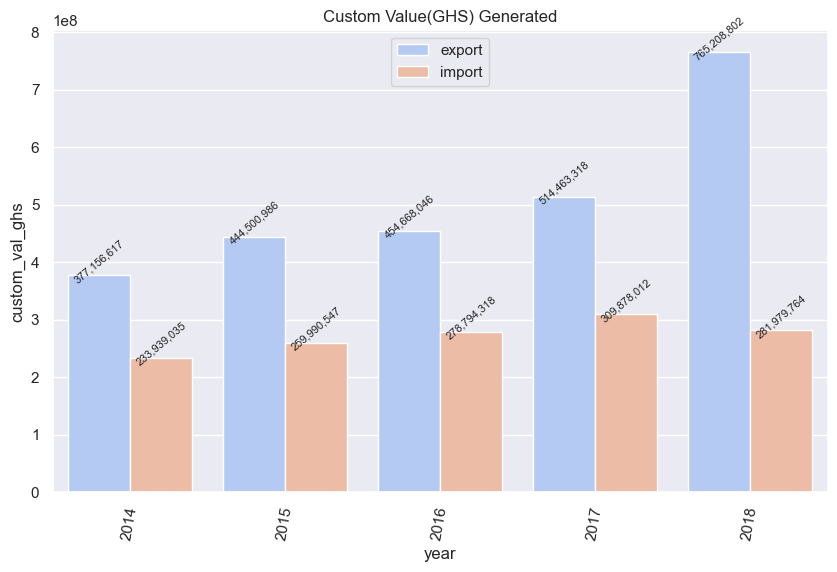

In [85]:
plt.figure(figsize=(10, 6)) 
a1 = sns.barplot(data = moti, x = 'year',y = 'custom_val_ghs', hue = 'imp_exp',errorbar = None, palette = 'coolwarm')
plt.xticks(rotation = 80)
plt.legend(loc = 'upper center')
plt.title("Custom Value(GHS) Generated")
for p in a1.patches:
    a1.annotate('{:,.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

### The custom value generated in cedis have an uprising curve but in relation to its dollar value, there is a reverse till 2018. This is as a result of the increase in dollar rate over the period of time under review 
***********************************

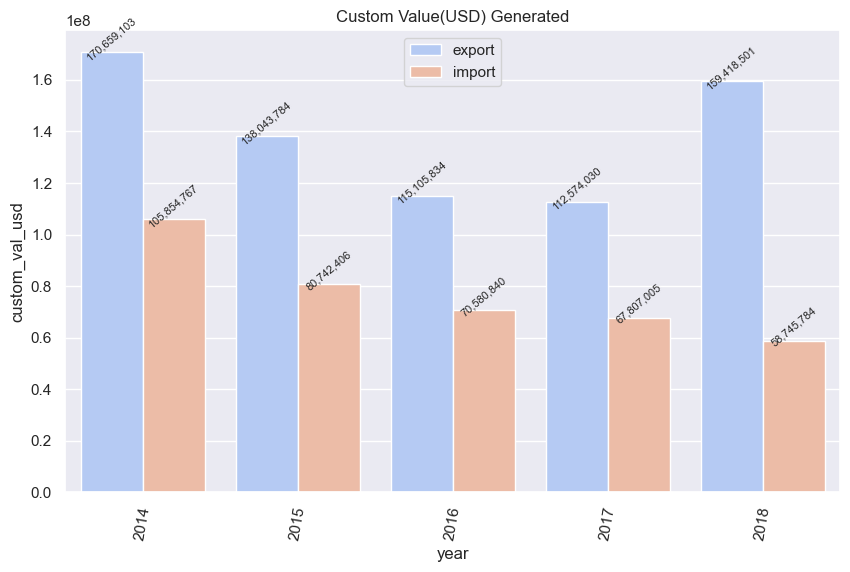

In [84]:
plt.figure(figsize=(10, 6)) 
a1 = sns.barplot(data = moti, x = 'year',y = 'custom_val_usd', hue = 'imp_exp',errorbar = None, palette = 'coolwarm')
plt.xticks(rotation = 80)
plt.legend(loc = 'upper center')
plt.title("Custom Value(USD) Generated")
for p in a1.patches:
    a1.annotate('{:,.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

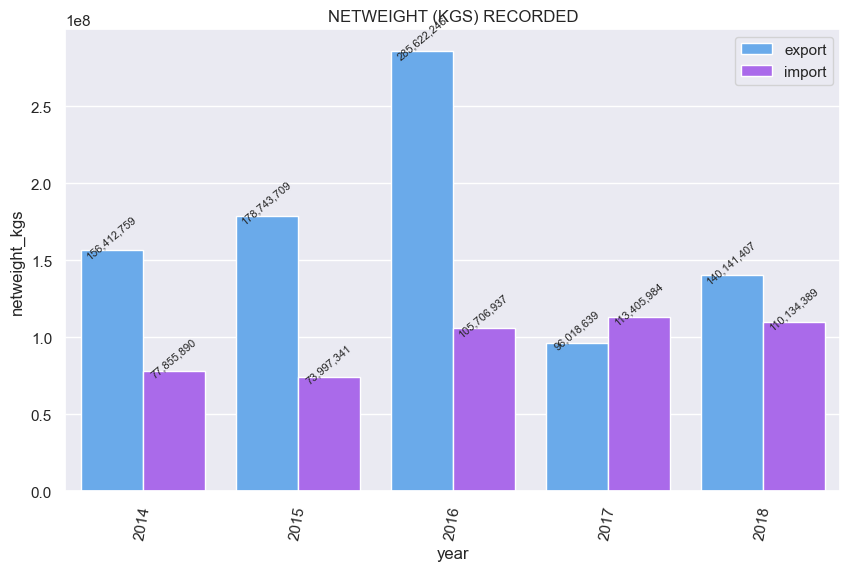

In [349]:
plt.figure(figsize=(10, 6)) 
a1 = sns.barplot(data = moti, x = 'year',y = 'netweight_kgs', hue = 'imp_exp',errorbar = None, palette = 'cool')
plt.xticks(rotation = 80)
plt.legend(loc = 'upper right')
plt.title("NETWEIGHT (KGS) RECORDED")
for p in a1.patches:
    a1.annotate('{:,.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

#### 2017 has the highest the import and 2016 has the highest export netweight. 

In [346]:
# expt = moti[moti.imp_exp == 'export']
# expt_sort = expt.sort_values(by = 'custom_val_ghs', ascending = False).head(10)
# expt_sort

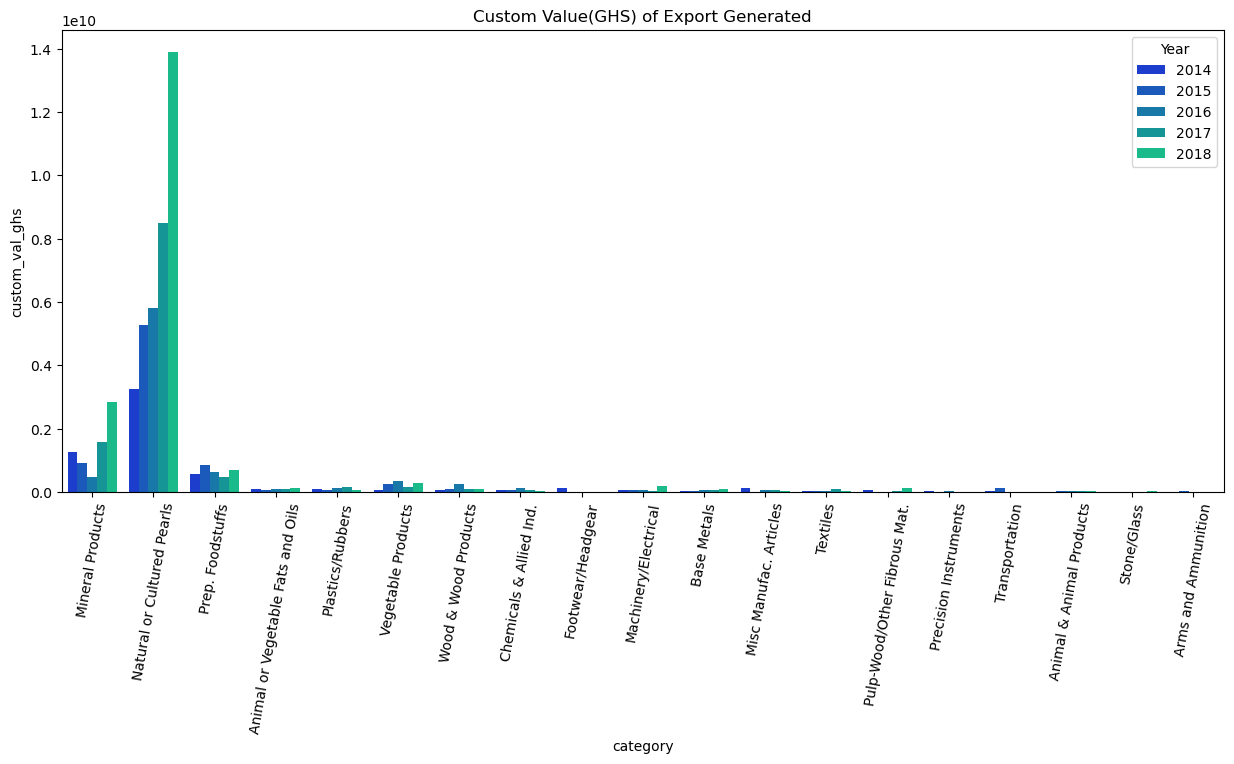

In [42]:
plt.figure(figsize=(15, 6)) 
a1 = sns.barplot(data = expt, x = 'category',y = 'custom_val_ghs', hue = 'year', palette = 'winter',errorbar = None)
plt.xticks(rotation = 80)
plt.legend(loc = 'upper right', title = 'Year')
plt.title("Custom Value(GHS) of Export Generated")
# for p in a1.patches:
#     a1.annotate('{:,.0f}'.format(p.get_height()),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

In [43]:
impt = moti[moti.imp_exp == 'import']

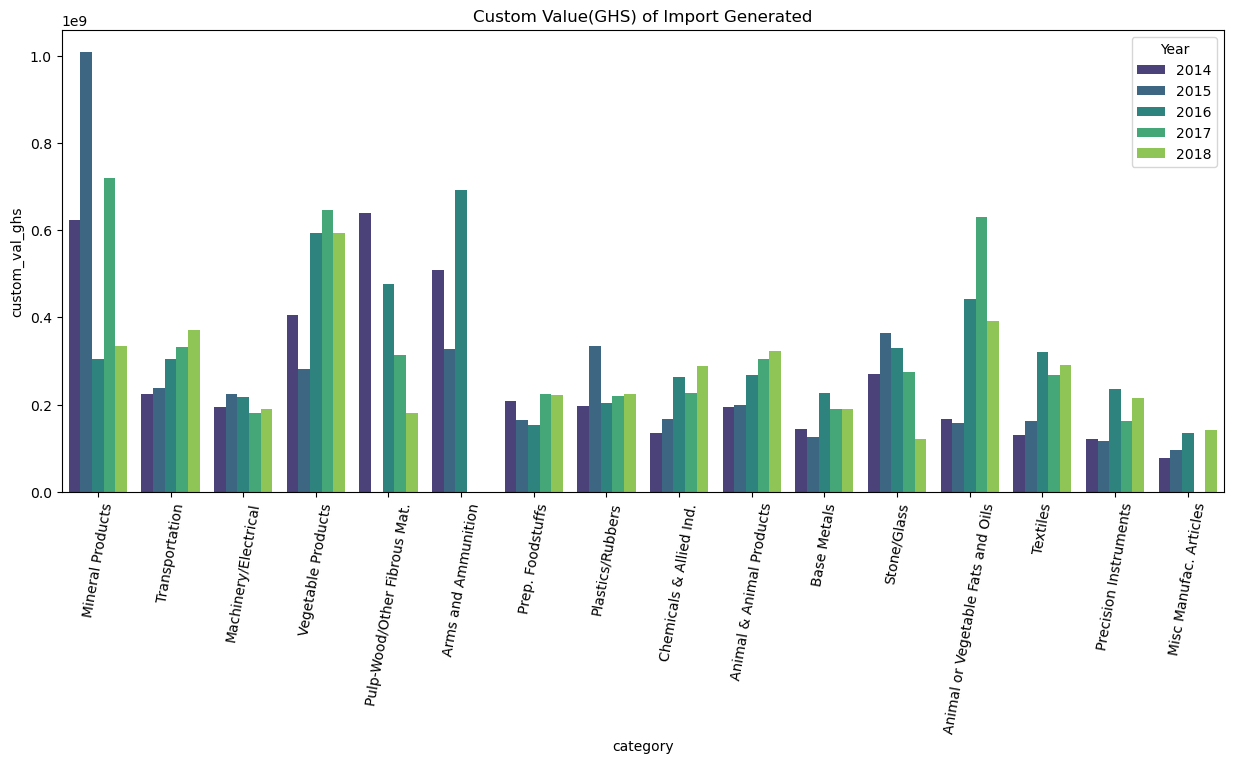

In [44]:
plt.figure(figsize=(15, 6)) 
a1 = sns.barplot(data = impt, x = 'category',y = 'custom_val_ghs', hue = 'year', palette = 'viridis',errorbar = None)
plt.xticks(rotation = 80)
plt.legend(loc = 'upper right', title = 'Year')
plt.title("Custom Value(GHS) of Import Generated")
# for p in a1.patches:
#     a1.annotate('{:,.0f}'.format(p.get_height()),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

##### INVESTIGATING (NATURAL / CULTURED PEARLS) HIGHEST CATEGORY OF GENERATED CUSTOM VALUE FROM EXPORT 

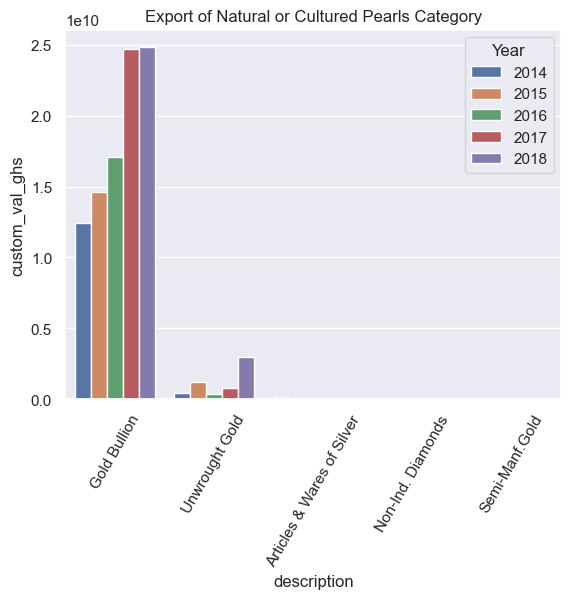

In [114]:
pearls = expt[expt.category == "Natural or Cultured Pearls"]
sns.barplot(data = pearls, x = 'description', y = 'custom_val_ghs',hue = 'year')
label = ['Gold Bullion','Unwrought Gold','Articles & Wares of Silver','Non-Ind. Diamonds','Semi-Manf.Gold']
plt.xticks(ticks = plt.xticks()[0],labels = label,rotation = 60)# 
plt.title('Export of Natural or Cultured Pearls Category')
plt.legend(title = 'Year', loc = 'upper right')
plt.show()

##### INVESTIGATING (MINERAL PRODUCTS) HIGHEST CATEGORY OF GENERATED CUSTOM VALUE FROM EXPORT 

In [314]:
minim = impt[impt.category == "Mineral Products"]
#sns.heatmap(data = minim)
hh = minim.pivot_table(columns = 'year',values = 'custom_val_ghs', aggfunc = 'sum', index = 'description')

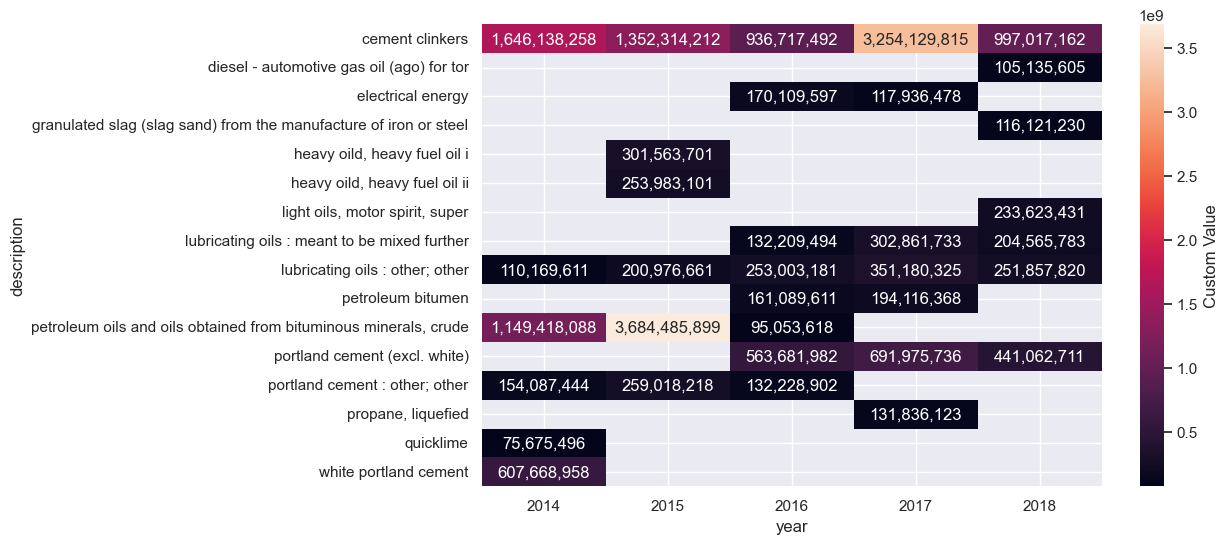

In [315]:
plt.figure(figsize=(10,6))
sns.heatmap(data = hh, linecolor = 'blue',annot=True, fmt=',.0f', cbar_kws={'label': 'Custom Value'})
plt.show()

In [161]:
# plt.figure(figsize=(17, 6)) 
# minim = impt[impt.category == "Mineral Products"]
# #minim = minim.(head
# sns.barplot(data = minim, x = 'description', y = 'custom_val_ghs', hue = 'year')
# label= ['Cement Clinkers','Bituminous Minerals','White Cement','Other Cement','Lube Oils','Quicklime','Heavy Oil I', 'Heavy Oil II','Excl White','Elec Energy','Petrol Bitumen','Raw Lube','Propane','Light Oil','slag sand','diesel']
# plt.xticks(ticks = plt.xticks()[0],labels = label,rotation = 60)#
# plt.title('Import of Mineral Products')
# plt.legend(title = 'Year', loc = 'upper right')
# plt.show()

##### FREQUENT WORDS BY ITEM DESCRIPTION

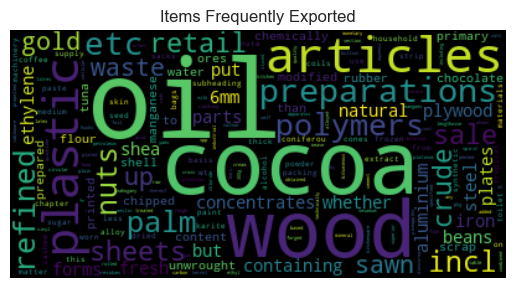

In [352]:
ll = []
for i in expt['description']:
    i.split()
    ll.append(i)

#ll.split() 
nii =" ".join(ll)
stopwords_list = ['other','of','and','or','nes','for','in','not','the','non','with','fractions','a','excl','its']

word_expcl = WordCloud(stopwords = stopwords_list,collocations = False, background_color = 'black').generate(nii)
plt.imshow(word_expcl, interpolation = 'bilinear')
#plt.figure(figsize=(10, 6)) 
plt.axis("off")
plt.title('Items Frequently Exported')
plt.show()

************************
#### In export, the most frequent, commodity exported is oil,cocoa, and wood but they do not generate the greater custom value for the export.
**************

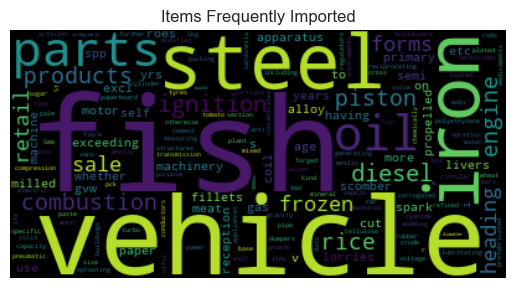

In [159]:
im = []
for i in impt['description']:
    i.split()
    im.append(i)

#ll.split() 
imnii =" ".join(im)
stopwords_list = ['other','of','and','or','nes','for','in','not','the','non','with','fractions','a','cc','rolled','excluding','internal','used','but','put','than','new','form','up']

word_expcl = WordCloud(stopwords = stopwords_list,collocations = False, background_color = 'black').generate(imnii)
plt.imshow(word_expcl, interpolation = 'bilinear')
#plt.figure(figsize=(10, 6)) 
plt.axis("off")
plt.title('Items Frequently Imported')
plt.show()

******
#### Fish, vehicle are the most frequent goods imported 
******

<Figure size 1000x600 with 0 Axes>

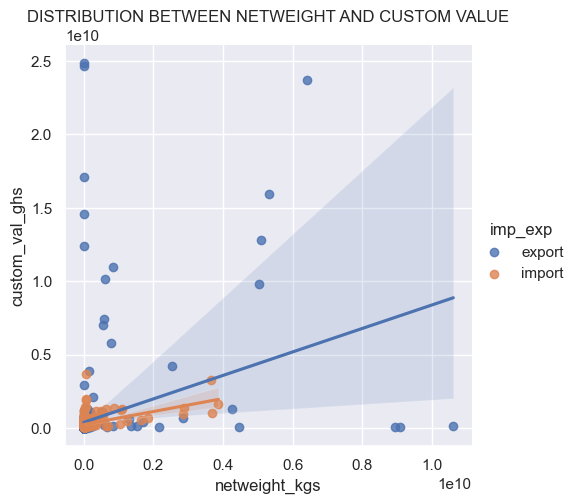

In [343]:
plt.figure(figsize=(10,6))
sns.lmplot(x = 'netweight_kgs',y = 'custom_val_ghs', data = moti, hue = 'imp_exp',)#x = 'custom_val_ghs',s=180
plt.title('DISTRIBUTION BETWEEN NETWEIGHT AND CUSTOM VALUE')
plt.show()

In [353]:
# plt.figure(figsize=(10, 6))
# #sns.boxplot(x='year', y='CUSTOM VALUE (GHS)', data=df, palette='Set2')

# sns.violinplot(x='year', y='custom_val_ghs', data=pearls,palette='Set3', inner='quartile')

# plt.title('Distribution of Custom Values by Year')
# plt.xlabel('Year')
# plt.ylabel('Custom Value (GHS)')
# plt.show()

##### FINDING OUTLIERS IN THE CUSTOM VALUE OF EXPORTS

In [266]:
IQR_expt = expt['custom_val_ghs'].quantile(0.75) - expt['custom_val_ghs'].quantile(0.25)
IQR_expt

92325922.0

In [267]:
low_expt = expt['custom_val_ghs'].quantile(0.25) - 1.5 * IQR_expt
low_expt

-117392986.75

In [268]:
high_expt = expt['custom_val_ghs'].quantile(0.75) + 1.5 * IQR_expt
high_expt

251910701.25

In [269]:
expt['custom_val_ghs'].max() < high_expt , expt['custom_val_ghs'].min() > low_expt

(False, True)

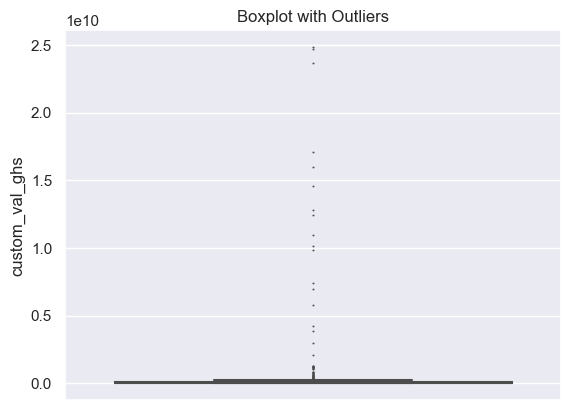

In [288]:
sns.boxplot(y = 'custom_val_ghs', data = expt ,fliersize = 0.5)
plt.title("Boxplot with Outliers")
plt.show()

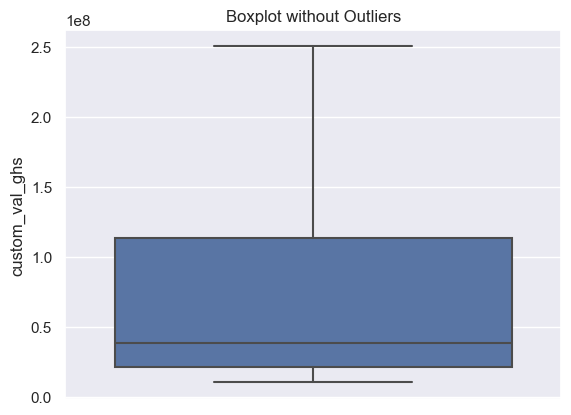

In [289]:
sns.boxplot(y = 'custom_val_ghs', data = expt,showfliers = False)
plt.title("Boxplot without Outliers")
plt.show()

##### FINDING OUTLIERS IN THE CUSTOM VALUE OF IMPORTS

In [258]:
IQR_impt = impt['custom_val_ghs'].quantile(0.75) - impt['custom_val_ghs'].quantile(0.25)
IQR_impt

192590295.25

In [259]:
low_impt = impt['custom_val_ghs'].quantile(0.25) - 1.5 * IQR_impt
low_impt

-172335306.625

In [261]:
high_impt = impt['custom_val_ghs'].quantile(0.75) + 1.5 * IQR_impt
high_impt

598025874.375

In [263]:
impt['custom_val_ghs'].max() < high_impt , expt['custom_val_ghs'].min() > low_impt

(False, True)

#### BENFORD'S LAW ANALYSIS ON CUSTOM VALUE OF EXPORTS

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=5.50075e-08, Tstat=49.3279


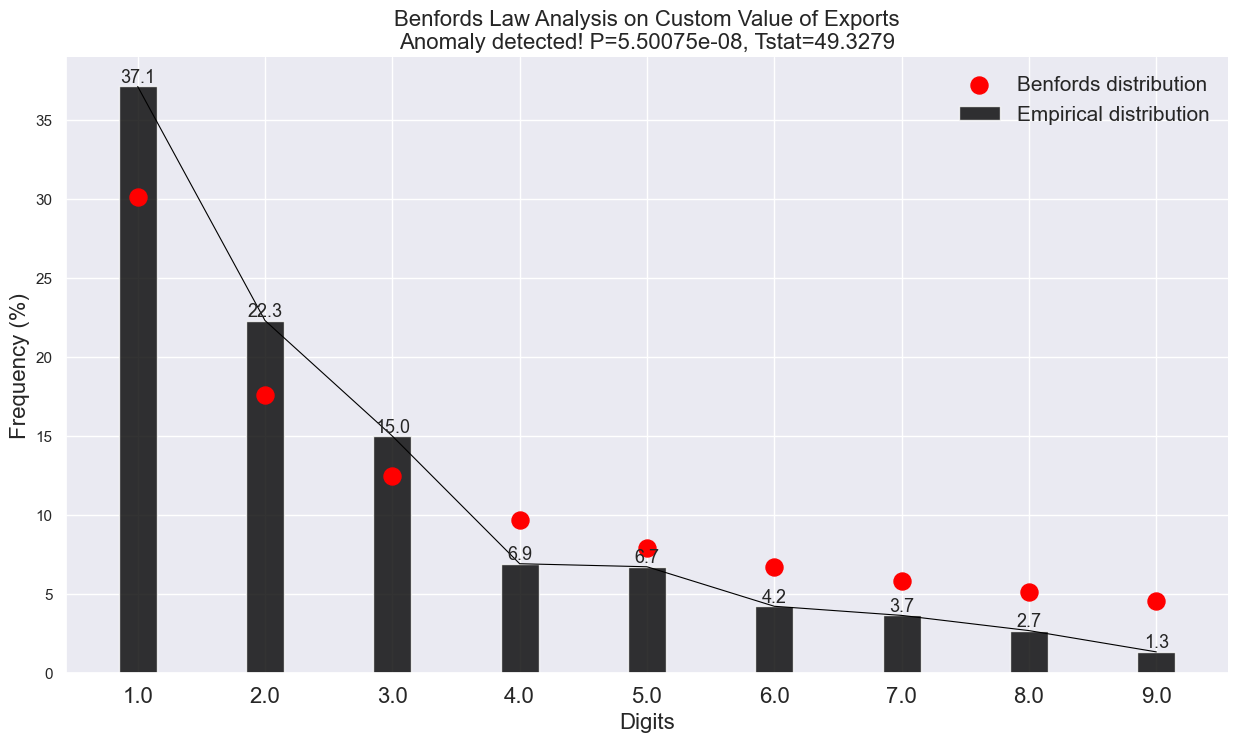

In [299]:
bl = benfordslaw(alpha = 0.05)
x1 = expt['custom_val_ghs']
results = bl.fit(x1)
bl.plot(title = "Benfords Law Analysis on Custom Value of Exports")
plt.show()

#### BENFORD'S LAW ANALYSIS ON CUSTOM VALUE OF EXPORTS

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.16418e-18, Tstat=102.759


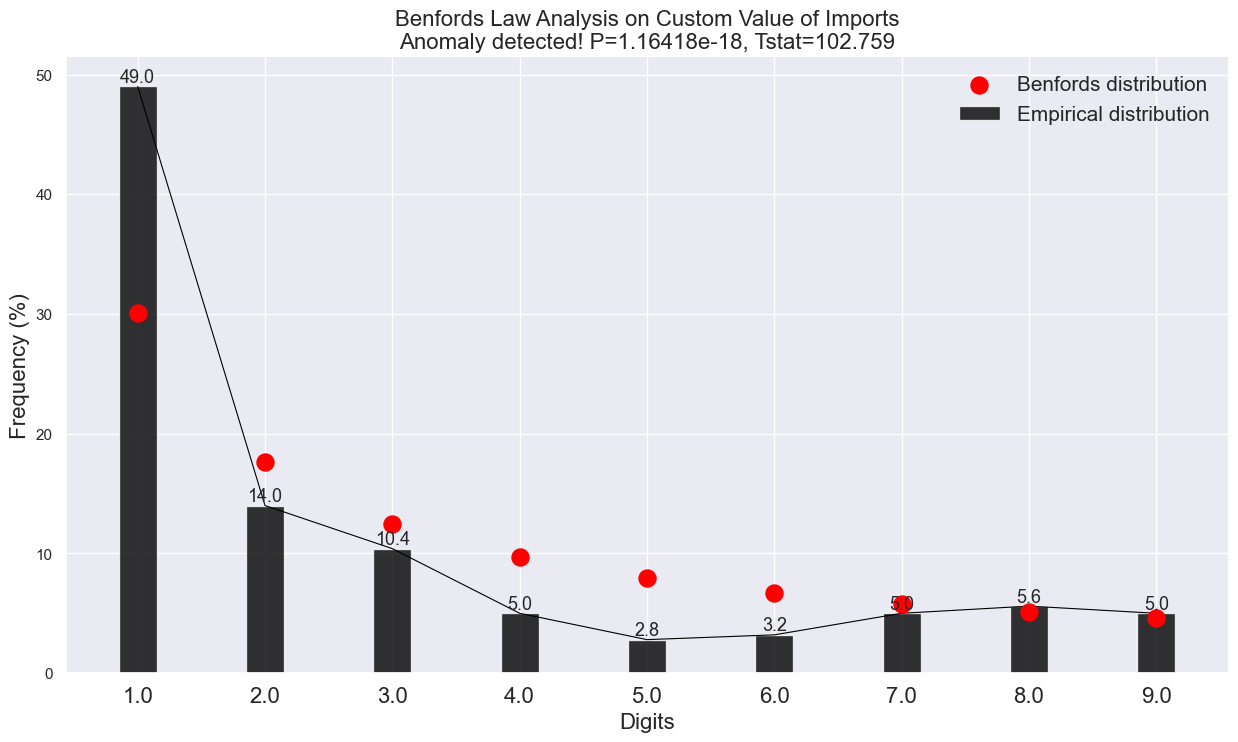

In [301]:
bl2 = benfordslaw(alpha = 0.05)
x2 = impt['custom_val_ghs']
results2 = bl2.fit(x2)
bl2.plot(title = "Benfords Law Analysis on Custom Value of Imports")
plt.show()

#### PRICING ANALYSIS

In [302]:
expt_std = expt.custom_val_ghs.std()
expt_std

2506441240.4780765

In [303]:
expt_mean = expt.custom_val_ghs.mean()
expt_mean

511325083.07884616

In [307]:
print(f" 68% of Custom Value of goods exported were between  {(expt_mean - expt_std,expt_mean + expt_std)} ")

 68% of Custom Value of goods exported were between  (-1995116157.3992302, 3017766323.5569224) 


In [308]:
print(f" 95% of Custom Value of goods exported were between  {(expt_mean - (2*expt_std),expt_mean + (2*expt_std))} ")

 95% of Custom Value of goods exported were between  (-4501557397.877307, 5524207564.034999) 


In [329]:
print(f" 97% of Custom Value of goods exported were between  {(expt_mean - (3*expt_std),expt_mean + (3*expt_std))} ")

 97% of Custom Value of goods exported were between  (-7007998638.355383, 8030648804.513075) 


In [320]:
a = (expt_mean - (3*expt_std),expt_mean + (3*expt_std))

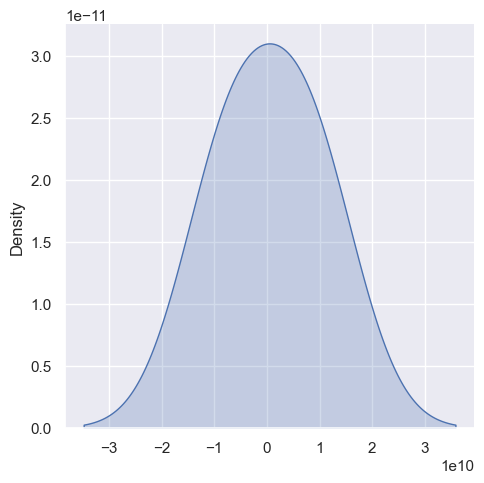

In [354]:
sns.displot(a,kind="kde", fill=True)#hue="species"
# plt.plot(a, stats.norm.pdf(a, expt_mean,expt_std))
# plt.show()